<a href="https://colab.research.google.com/github/mohamedprojects/Machine-Learning/blob/main/Simple_Linear_Non_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression
##Predicting CO2 Emmission of a car.

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv

--2021-10-05 20:21:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2021-10-05 20:21:26 (2.81 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Importing Needed packages


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 

### Downloading Data

we use !wget to download Data from IBM Object Storage.

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data analysis

In [ ]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
col=df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS' , 'FUELCONSUMPTION_COMB','MODELYEAR']]
col.head(5)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB,MODELYEAR
0,4,2.0,196,8.5,2014
1,4,2.4,221,9.6,2014
2,4,1.5,136,5.9,2014
3,6,3.5,255,11.1,2014
4,6,3.5,244,10.6,2014


In [ ]:
df["MODELYEAR"].unique()

array([2014])

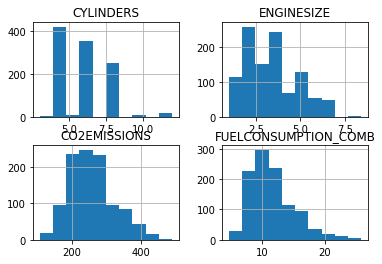

In [ ]:
vis= col.drop('MODELYEAR', axis=1)
vis.hist()
plt.show()

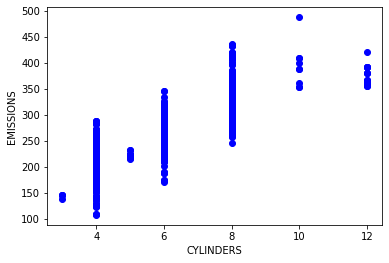

In [ ]:
plt.scatter(col.CYLINDERS, col.CO2EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSIONS')
plt.show()

<function matplotlib.pyplot.show>

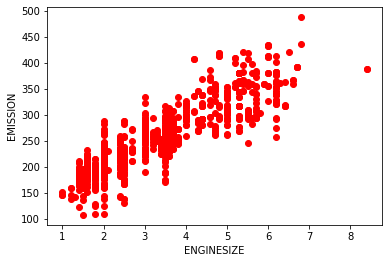

In [ ]:
plt.scatter(col.ENGINESIZE, col.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show

<function matplotlib.pyplot.show>

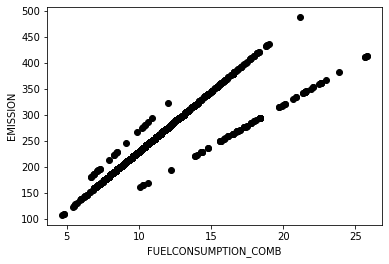

In [ ]:
plt.scatter(col.FUELCONSUMPTION_COMB, col.CO2EMISSIONS, color='black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSION")
plt.show

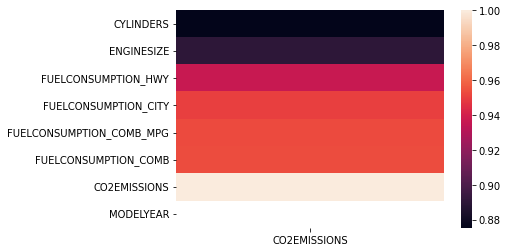

In [ ]:
import seaborn as sns
sns.heatmap(df.corr('spearman').abs()[['CO2EMISSIONS']].sort_values('CO2EMISSIONS'))

### Split our dataset

In [ ]:
# split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
spl= np.random.rand(len(df))< 0.8
train = col[spl]
test = col[~spl]

<function matplotlib.pyplot.show>

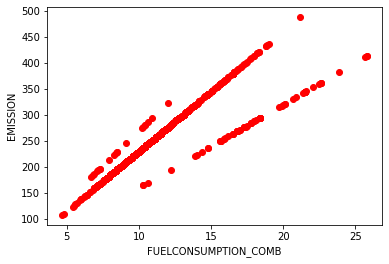

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSION")
plt.show

###**Modeling**

In [ ]:
# Using sklearn package to model data
from sklearn import linear_model 
reg = linear_model.LinearRegression()
X_train = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
Y_train = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(X_train, Y_train)
print("coefs:", reg.coef_)
print("intercept:", reg.intercept_)

coefs: [[16.3350795]]
intercept: [67.45230658]


Text(0, 0.5, 'Emissions')

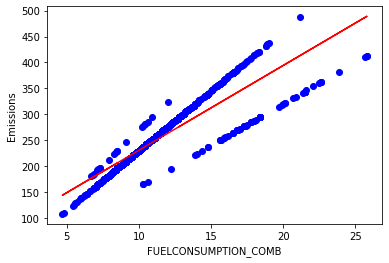

In [ ]:
# Plot the fit line over the data

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.plot(X_train, reg.coef_[0][0]*X_train + reg.intercept_[0], '-r')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emissions')

###Evaluation

In [ ]:
from sklearn.metrics import r2_score
test_x= np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = reg.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 21.17
R2-score: 0.75


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, reg.predict(test_x))

888.3946194306445

#Non Linear Regression
##Predicting China's GDP

In [ ]:
# Downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv

2021-10-05 20:22:02 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


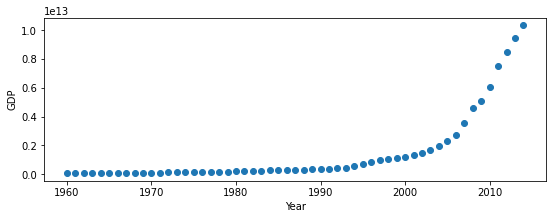

In [ ]:
plt.figure(figsize=(9,3))
data_x, data_y = (df["Year"].values, df["Value"].values)
plt.plot(data_x, data_y, 'o')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

# Choosing a model
From an initial look at the plot, we determine that the logistic function could be a good approximation.
Let see the function.


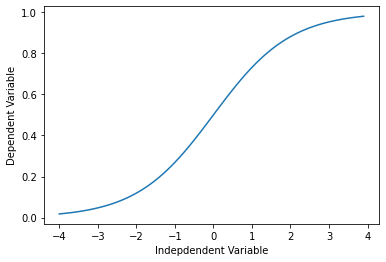

In [ ]:
# Logistic function

X = np.arange(-4, 4, 0.1)
Y = 1/(1 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [ ]:
# Define the function
def sigmoid(X, Beta_1, Beta_2):
  Y = 1/(1 + np.exp(-Beta_1*(X - Beta_2)))
  return Y

In [ ]:
# Normalize our data
xdata =data_x/max(data_x)
ydata =data_y/max(data_y)

In [ ]:
# Split dataset.
from scipy.optimize import curve_fit

msk = np.random.rand(len(df))< 0.8
x_train = xdata[msk]
y_train = ydata[msk]
x_test = xdata[~msk]
y_test = ydata[~msk]
popt, pcov = curve_fit(sigmoid, x_train, y_train)

In [ ]:
print('beta_1: %f , beta_2: %f'%(popt[0], popt[1]))

beta_1: 687.214093 , beta_2: 0.997199


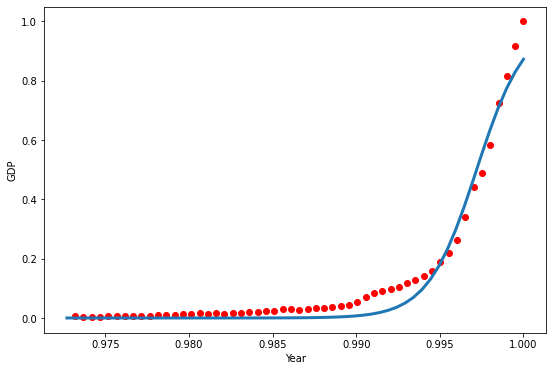

In [ ]:
# Plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(9,6))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
# Evaluation
y_pred= sigmoid(x_test, *popt)

from sklearn.metrics import r2_score
print("MAE: %.2f" % np.mean(np.abs(y_test - y_pred)))
print("MSE:%.2f" % np.mean(np.square(y_test - y_pred)))
print("r2_score:%.2f" % r2_score(y_test, y_pred))

MAE: 0.03
MSE:0.00
r2_score:0.97
